In [15]:
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from scipy.stats import linregress
from config import g_key


In [2]:
latlng_df = pd.DataFrame(pd.read_csv("CenPop2010CountyCenters.csv"))
latlng_df.head()

,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE
0,6,1,Alameda,California,1510271,37.705201,-122.100393
1,6,3,Alpine,California,1175,38.728298,-119.847603
2,6,5,Amador,California,38091,38.394208,-120.775729
3,6,7,Butte,California,220000,39.669037,-121.707635
4,6,9,Calaveras,California,45578,38.163627,-120.633718


In [3]:
ethnicity_df = pd.DataFrame(pd.read_excel("datapile_-_headline_datasets_-_current.xlsx", 'People'))
ethnicity_df.head()

,County,Population (January 2019),Population in Group Quarters (January 2019),Population: Unincorporated (January 2019),"Population: Unincorporated, Group Quarters (January 2019)",Race/Ethnicity: American Indian (2019),Race/Ethnicity: Asian (2019),Race/Ethnicity: Black (2019),Race/Ethnicity: Hispanic (2019),Race/Ethnicity: Multi-Racial/Ethnic (2019),...,Registered Voters: Republican (February 2019),Registered Voters: Other Party (February 2019),Labor Force: Employed (2018),Labor Force: Unemployed (2018),Labor Force: Unemployment Rate (2018),Poverty: All Ages (2017),Poverty: All Ages Percent (2017),Poverty: Under 18 (2017),Poverty: Under 18 Percent (2017),Median Household Income (2017)
0,Alameda,1669301,39821,149536,2356.0,4849,443972,192977,391815,69855,...,95587,31070,822800,25400,0.030,152087,0.093,35658,0.105,95550
1,Alpine,1162,24,1162,24.0,202,6,1,85,22,...,200,42,520,30,0.046,202,0.181,67,0.353,55755
2,Amador,38294,4362,21774,151.0,594,454,1024,5311,1021,...,9809,1439,14120,590,0.040,3762,0.109,908,0.157,60588
3,Butte,226466,4970,78702,360.0,3361,10141,3666,35848,8801,...,41330,7398,97600,5100,0.049,40728,0.181,10208,0.226,48634
4,Calaveras,45117,507,41277,460.0,532,589,371,5114,1320,...,12200,2173,20510,850,0.040,5904,0.131,1590,0.211,58536


In [4]:
ethnicity_df.drop(columns=['Population in Group Quarters (January 2019)',
       'Population: Unincorporated (January 2019)',
       'Population: Unincorporated, Group Quarters (January 2019)', 'Age: 0-5 (2019)', 'Age: 6-17 (2019)',
       'Age: 18-64 (2019)', 'Age: 65+ (2019)',
       'Eligible Voters (February 2019)',
       'Registered Voters: No Party (February 2019)',
       'Registered Voters: Democrat (February 2019)',
       'Registered Voters: Republican (February 2019)',
       'Registered Voters: Other Party (February 2019)',
       'Labor Force: Employed (2018)', 'Labor Force: Unemployed (2018)',
       'Labor Force: Unemployment Rate (2018)', 'Poverty: All Ages (2017)',
       'Poverty: All Ages Percent (2017)', 'Poverty: Under 18 (2017)',
       'Poverty: Under 18 Percent (2017)', 'Median Household Income (2017)'], inplace=True)

In [5]:
ethnicity_df['Minority'] = ethnicity_df['Race/Ethnicity: American Indian (2019)'] + ethnicity_df['Race/Ethnicity: Asian (2019)'] + ethnicity_df['Race/Ethnicity: Black (2019)'] + ethnicity_df['Race/Ethnicity: Hispanic (2019)'] + ethnicity_df['Race/Ethnicity: Multi-Racial/Ethnic (2019)'] + ethnicity_df['Race/Ethnicity: Hawaiian/ Pacific Island (2019)']
ethnicity_df['Minority %'] = (ethnicity_df['Minority']/ethnicity_df['Population (January 2019)'])*100
ethnicity_df['White %'] = (ethnicity_df['Race/Ethnicity: White (2019)']/ethnicity_df['Population (January 2019)'])*100


ethnicity_df.head()

,County,Population (January 2019),Race/Ethnicity: American Indian (2019),Race/Ethnicity: Asian (2019),Race/Ethnicity: Black (2019),Race/Ethnicity: Hispanic (2019),Race/Ethnicity: Multi-Racial/Ethnic (2019),Race/Ethnicity: Hawaiian/ Pacific Island (2019),Race/Ethnicity: White (2019),Minority,Minority %,White %
0,Alameda,1669301,4849,443972,192977,391815,69855,13634,562667,1117102,66.920346,33.706743
1,Alpine,1162,202,6,1,85,22,0,830,316,27.194492,71.428571
2,Amador,38294,594,454,1024,5311,1021,64,29802,8468,22.113125,77.824202
3,Butte,226466,3361,10141,3666,35848,8801,474,166738,62291,27.505674,73.626063
4,Calaveras,45117,532,589,371,5114,1320,71,36745,7997,17.725026,81.443802


In [6]:
gmaps.configure(api_key=g_key)

whiteMap = gmaps.figure()
minorityMap = gmaps.figure()
largestMinoritiesMap = gmaps.figure()
smallestMinoritiesMap = gmaps.figure()


locations = latlng_df[["LATITUDE", "LONGITUDE"]].astype(float)

In [ ]:
#Heatmap of % of Population White By County

In [7]:
heat_layer_white = gmaps.heatmap_layer(locations, weights=ethnicity_df['White %'], dissipating=False, max_intensity=100, point_radius = .7)

whiteMap.add_layer(heat_layer_white)

whiteMap

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Heatmap of % of Population Non-White By County

In [8]:
heat_layer_minority = gmaps.heatmap_layer(locations, weights=ethnicity_df['Minority %'], dissipating=False, max_intensity=100, point_radius = 0.7)

minorityMap.add_layer(heat_layer_minority)


minorityMap

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Heatmap of % of Two Largest Minorities By County

In [9]:
ethnicity_df['Largest Two %'] = ((ethnicity_df['Race/Ethnicity: Asian (2019)'] + ethnicity_df['Race/Ethnicity: Hispanic (2019)'])/ethnicity_df['Population (January 2019)'])*100

heat_layer_minority = gmaps.heatmap_layer(locations, weights=ethnicity_df['Largest Two %'], dissipating=False, max_intensity=100, point_radius = 0.7)

largestMinoritiesMap.add_layer(heat_layer_minority)


largestMinoritiesMap

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Heatmap of % of Four Smallest Minorities By County

In [10]:
ethnicity_df['Smallest Four %'] = ((ethnicity_df['Race/Ethnicity: American Indian (2019)'] + ethnicity_df['Race/Ethnicity: Black (2019)'] + ethnicity_df['Race/Ethnicity: Multi-Racial/Ethnic (2019)'] + ethnicity_df['Race/Ethnicity: Hawaiian/ Pacific Island (2019)'])/ethnicity_df['Population (January 2019)'])*100

heat_layer_minority = gmaps.heatmap_layer(locations, weights=ethnicity_df['Smallest Four %'], dissipating=False, max_intensity=50, point_radius = 0.7)

smallestMinoritiesMap.add_layer(heat_layer_minority)


smallestMinoritiesMap

Figure(layout=FigureLayout(height='420px'))

In [13]:
#Food insecurity data to compare

foodInsecurity_df = pd.DataFrame(pd.read_csv("Feeding-America-Projections-March 2021-Food-Insecurity.csv"))
CA_df = foodInsecurity_df.loc[foodInsecurity_df['State'] == 'CA']
CA_df.reset_index(drop=True, inplace=True)
CA_df = CA_df.drop(columns=['[Revised Projections – March 2021]\n2020 Food Insecurity #',
                            '[Revised Projections – March 2021]\n2020 Food Insecurity % Change',
                            '[Revised Projections – March 2021]\n2020 Food Insecurity # Change',
                            '[Revised Projections – March 2021]\nAdjusted Annual Unemployment Change','Total Child Population', '2019 Child Food Insecurity  %', '2019 Child Food Insecurity #', 
                            '[Revised Projections – March 2021]\n2020 Child Food Insecurity  %',
                            '[Revised Projections – March 2021]\n2020 Child Food Insecurity #', 
                            '[Revised Projections – March 2021]\n2020 Child Food Insecurity % Change',
                            '[Revised Projections – March 2021]\n2020 Child Food Insecurity # Change',
                            '2019 Food Insecurity %', '2019 Food Insecurity #', 'County, State', 'State']) 
CA_df = CA_df.loc[CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'].isnull().values == False]
CA_df['FIPS'] = CA_df['FIPS'] - 6000
CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'] = CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %']*100
CA_df.head()

,FIPS,Total Population,[Revised Projections – March 2021]\n2020 Food Insecurity %
0,1,1656754,12.2
1,3,1039,17.3
2,5,38429,14.2
3,7,225817,17.2
4,9,45514,14.6


The St. Pearson Correlation Coefficient between both factors is 0.1


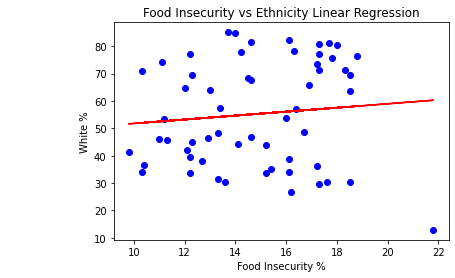

In [16]:
slope, intercept, rValue, pValue, std_err = linregress(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'], ethnicity_df['White %'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')


line_best_fit = slope*(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %']) + intercept


annotation_string = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(annotation_string, xy=(5,30), fontsize=13, color='red')
plt.plot(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'],line_best_fit,"-", color='red')

plt.xlabel('Food Insecurity %')
plt.ylabel('White %')
plt.title('Food Insecurity vs Ethnicity Linear Regression')

plt.scatter(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'], ethnicity_df['White %'], marker='o', facecolors='blue', edgecolors='blue')
plt.show()


In [ ]:
slope, intercept, rValue, pValue, std_err = linregress(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'], ethnicity_df['White %'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')


line_best_fit = slope*(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %']) + intercept


annotation_string = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(annotation_string, xy=(5,30), fontsize=13, color='red')
plt.plot(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'],line_best_fit,"-", color='red')

plt.xlabel('Food Insecurity %')
plt.ylabel('White %')
plt.title('Food Insecurity vs Ethnicity Linear Regression')

plt.scatter(CA_df['[Revised Projections – March 2021]\n2020 Food Insecurity  %'], ethnicity_df['White %'], marker='o', facecolors='blue', edgecolors='blue')
plt.show()